In [1]:
import import_ipynb

from base_color import *
from util import *
from eccv16 import *

importing Jupyter notebook from base_color.ipynb
importing Jupyter notebook from util.ipynb


You should consider upgrading via the 'c:\users\monis\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\monis\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


importing Jupyter notebook from eccv16.ipynb


In [2]:
import argparse
import matplotlib.pyplot as plt

In [3]:
img_path = "C:\\Users\\monis\\Desktop\\colorization\\pr2.jpg"

In [4]:
img = load_img(img_path)
(tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))


In [5]:
colorizer_eccv16 = eccv16(pretrained=True).eval()

In [6]:
img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
out_img_eccv16 = postprocess_tens(tens_l_orig, colorizer_eccv16(tens_l_rs).cpu())

c:\users\monis\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
c:\users\monis\appdata\local\programs\python\python38\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


In [7]:
#plt.imsave('%s_eccv16.png', out_img_eccv16)

(-0.5, 1499.5, 999.5, -0.5)

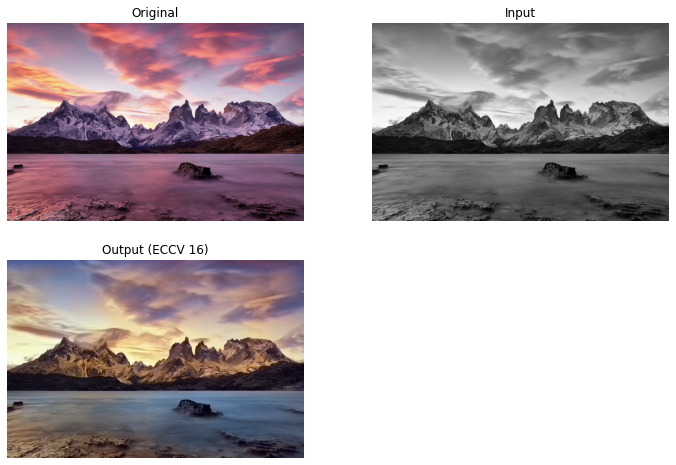

In [8]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_bw)
plt.title('Input')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(out_img_eccv16)
plt.title('Output (ECCV 16)')
plt.axis('off')

In [9]:
out_ab = colorizer_eccv16(tens_l_rs).cpu()
#out_ab
HW_orig = tens_l_orig.shape[2:]
HW = out_ab.shape[2:]

    # call resize function if needed
if(HW_orig[0]!=HW[0] or HW_orig[1]!=HW[1]):
    out_ab_orig = F.interpolate(out_ab, size=HW_orig, mode='bilinear')
else:
    out_ab_orig = out_ab

out_lab = torch.cat((1*tens_l_orig, out_ab_orig), dim=1)
out_ab_only = out_lab.data.cpu().numpy()[0,...].transpose((1,2,0))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1499.5, 999.5, -0.5)

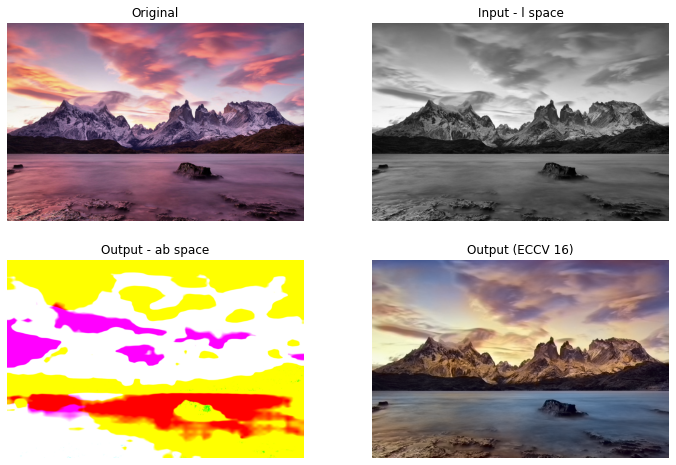

In [10]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_bw)
plt.title('Input - l space')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(out_ab_only)
plt.title('Output - ab space')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(out_img_eccv16)
plt.title('Output (ECCV 16)')
plt.axis('off')